# Setup

In [1]:
import pandas as pd
import polars as pl 
import numpy as np

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from all import NLP_Preprocessing

from sklearn.feature_extraction.text import (CountVectorizer, 
                                             TfidfVectorizer)
from sklearn.preprocessing import (LabelEncoder,
                                   OneHotEncoder)
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (confusion_matrix)

from tensorflow import keras
from keras import layers

In [2]:
tools = NLP_Preprocessing()

In [3]:
data = pl.read_csv("./dataset.csv")

In [4]:
data.head()

app_id,app_name,review_text,review_score,review_votes
i64,str,str,i64,i64
10,"""Counter-Strike""","""Ruined my life.""",1,0
10,"""Counter-Strike""","""This will be more of a ''my ex…",1,1
10,"""Counter-Strike""","""This game saved my virginity.""",1,0
10,"""Counter-Strike""","""• Do you like original games? …",1,0
10,"""Counter-Strike""",""" Easy to learn, hard to…",1,1


In [5]:
data.shape

(6417106, 5)

In [6]:
data["review_score"].value_counts()["review_score"]

review_score
i64
-1
1


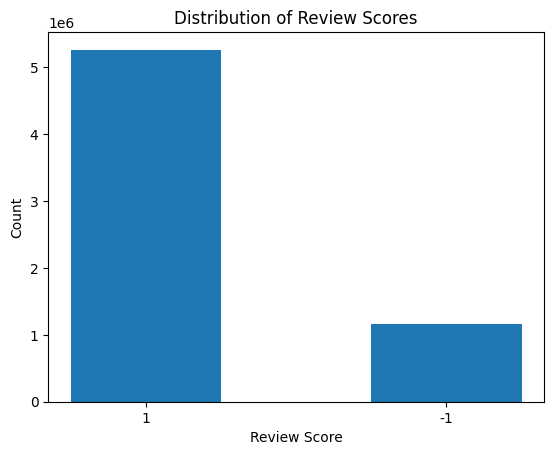

In [7]:
value_counts = data["review_score"].value_counts()
cols = value_counts["review_score"].to_numpy().astype(str)
counts = value_counts["count"].to_numpy() 

plt.bar(cols, counts, width=0.5)
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.title("Distribution of Review Scores")
plt.show()

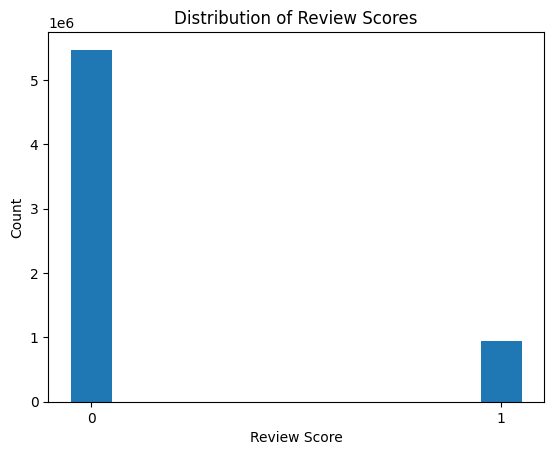

In [8]:
value_counts = data["review_votes"].value_counts()
cols = value_counts["review_votes"].to_numpy().astype(str)
counts = value_counts["count"].to_numpy() 

plt.bar(cols, counts, width=0.1)
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.title("Distribution of Review Scores")
plt.show()

# Tiền xử lý dữ liệu

In [9]:
data.null_count()

app_id,app_name,review_text,review_score,review_votes
u32,u32,u32,u32,u32
0,183234,7305,0,0


In [10]:
data.null_count()*100/len(data)

app_id,app_name,review_text,review_score,review_votes
f64,f64,f64,f64,f64
0.0,2.855399,0.113836,0.0,0.0


In [11]:
data["review_text"].null_count()/len(data)

0.0011383636174936177

In [12]:
data = data[:, ["review_text", "review_votes"]]

In [13]:
data = data.drop_nulls()

In [14]:
data.null_count()*100/len(data)

review_text,review_votes
f64,f64
0.0,0.0


In [15]:
data = data.unique()

In [16]:
data.shape

(4483987, 2)

# Chọn dữ liệu nhỏ hơn

In [17]:
n_sample = 50

In [18]:
# Tron du lieu dam bao tinh ngau nhien
shuffled_data = data.sample(fraction=1, shuffle=True, seed=42)

In [19]:
# Lay n phan tu cua tieu cuc
votes_0 = shuffled_data.filter(pl.col("review_votes") == 0)
votes_0 = votes_0.head(n_sample)
votes_0.head()

review_text,review_votes
str,i64
"""Fun, ambient, violent, true to…",0
"""very fun game! faster and more…",0
"""You have to really be old scho…",0
"""i love this game i wish icould…",0
"""Received a key for this in a b…",0


In [20]:
votes_1 = shuffled_data.filter(pl.col("review_votes") == 1)
votes_1 = votes_1.head(n_sample)
votes_1.head()

review_text,review_votes
str,i64
"""This is absolutely disgusting …",1
"""ramed a guy into an exploading…",1
"""Outlast was really creepy and …",1
"""YO THIS GAME IS PRETTY TIGHT Y…",1
"""10/10 Damn KeyBoard Broke On …",1


In [21]:
small_data = pl.concat([votes_0, votes_1])
print(small_data["review_votes"].unique())
small_data.shape

shape: (2,)
Series: 'review_votes' [i64]
[
	0
	1
]


(100, 2)

In [22]:
docs = small_data["review_text"]
labels = small_data["review_votes"]

In [23]:
tokens = tools.preprocess(docs)
docs = tools.get_corpus(tokens)

In [24]:
print(tokens[0])
print(docs[0])

['fun', 'ambient', 'violent', 'true', 'definit', 'unfinish', 'return', 'game', 'perman', 'item', 'game', 'list', 'pro', 'claustrophob', 'extrem', 'detail', 'textur', 'everyth', 'room', 'make', 'feel', 'sheer', 'scale', 'vessel', 'great', 'direct', 'sound', 'neat', 'model', 'use', 'paint', 'thing', 'definit', 'notic', 'con', 'super', 'finish', 'optim', 'onlin', 'coop', 'stabil', 'narrow', 'tower', 'problem', 'im', 'play', 'sometim', 'whether', 'play', 'minor', 'con', 'cluster', 'spend', 'lot', 'time', 'glu', 'one', 'anoth', 'oppos', 'stand', 'next']
fun ambient violent true definit unfinish return game perman item game list pro claustrophob extrem detail textur everyth room make feel sheer scale vessel great direct sound neat model use paint thing definit notic con super finish optim onlin coop stabil narrow tower problem im play sometim whether play minor con cluster spend lot time glu one anoth oppos stand next


# TF-IDF

In [25]:
X = docs
y = labels.to_numpy()

In [26]:
tfidf_vectorizer = TfidfVectorizer(norm="l2")
X = tfidf_vectorizer.fit_transform(X)
X.shape

(100, 1345)

In [27]:
X = X.toarray()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=42)

<Axes: >

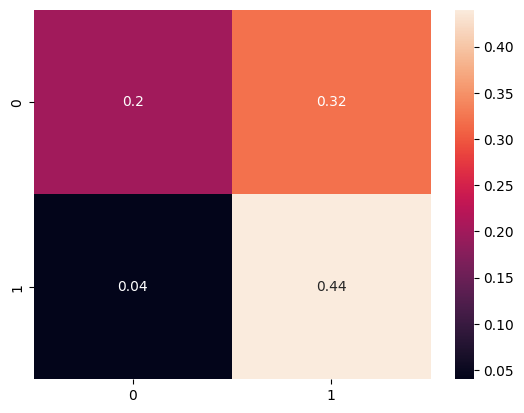

In [29]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_cfs_mtx = confusion_matrix(y_test, y_pred)

sns.heatmap(nb_cfs_mtx/np.sum(nb_cfs_mtx), annot=True)

# Word Embedding

## One-hot encoding

In [30]:
flat_tokens = [token for sublist in tokens for token in sublist]
print(len(flat_tokens))


4175


In [31]:
le = LabelEncoder()
le.fit(flat_tokens)

LabelEncoder()

In [32]:
print('Class of words: ', le.classes_)
lbl_encoded = le.transform(flat_tokens)
print(lbl_encoded)
print(le.inverse_transform(lbl_encoded))

Class of words:  ['abl' 'aboard' 'absent' ... 'zen' 'zero' 'zombi']
[ 488   49 1286 ...  287 1085  493]
['fun' 'ambient' 'violent' ... 'date' 'sim' 'game']


In [33]:

oh = OneHotEncoder()
classes_indices = list(zip(le.classes_, np.arange(len(le.classes_))))
print('Classes_indices: ', classes_indices)
oh.fit(classes_indices)
print('One-hot categories and indices:', oh.categories_)
# Biến đổi list words sang dạng one-hot
words_indices = list(zip(flat_tokens, lbl_encoded))
print('Words and corresponding indices: ', words_indices)
one_hot = oh.transform(words_indices).toarray()
print('Transform words into one-hot matrices: \n', one_hot)
print('Inverse transform to categories from one-hot matrices: \n', oh.inverse_transform(one_hot))


Classes_indices:  [(np.str_('abl'), np.int64(0)), (np.str_('aboard'), np.int64(1)), (np.str_('absent'), np.int64(2)), (np.str_('absolut'), np.int64(3)), (np.str_('acceler'), np.int64(4)), (np.str_('accept'), np.int64(5)), (np.str_('access'), np.int64(6)), (np.str_('accomplish'), np.int64(7)), (np.str_('accord'), np.int64(8)), (np.str_('account'), np.int64(9)), (np.str_('accustom'), np.int64(10)), (np.str_('achiev'), np.int64(11)), (np.str_('acquir'), np.int64(12)), (np.str_('across'), np.int64(13)), (np.str_('act'), np.int64(14)), (np.str_('action'), np.int64(15)), (np.str_('actress'), np.int64(16)), (np.str_('actual'), np.int64(17)), (np.str_('add'), np.int64(18)), (np.str_('addict'), np.int64(19)), (np.str_('addit'), np.int64(20)), (np.str_('address'), np.int64(21)), (np.str_('admittedli'), np.int64(22)), (np.str_('adrenalin'), np.int64(23)), (np.str_('advantag'), np.int64(24)), (np.str_('adventur'), np.int64(25)), (np.str_('advertis'), np.int64(26)), (np.str_('aforement'), np.int64(

In [34]:
print(one_hot.shape)

(4175, 2694)


## Auto Encoder

In [35]:
print(*le.classes_)

abl aboard absent absolut acceler accept access accomplish accord account accustom achiev acquir across act action actress actual add addict addit address admittedli adrenalin advantag adventur advertis aforement afraid africa aftermath age agreement ai aim air alex aliv allow almost alon along alongsid alreadi alright also although alway amaz ambient ambit among amount amp amus andi anim annoy anoth answer anyon anyth appar appli appreci appropri arcad archer area argu around arrow art artifici ask assassin asset assign assist associ atari attack attempt aura australian authent author auto automat avail averag aw award away awe awesom b babi back bad balanc ball ban barbarian barrier base basic batman battl battlefield beach beat beauti becom bedroom begin behaviour behind believ besid best beta better beyond big bigger biggest bit bizarr black blast blend block blow blunder board boat bodi bog book bore boss bought box branch break breakdown bright bring broke broken brought bruce bu

In [36]:
class AutoEncoder(layers.Layer):

    def __init__(self, in_units, hidden_units):
        super().__init__()
        self.dense1 = layers.Dense(in_units, activation="relu")
        self.dense2 = layers.Dense(hidden_units, activation="relu")
        self.dense3 = layers.Dense(in_units, activation="softmax")

    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)

        return x

In [37]:
inputs = layers.Input(shape=(one_hot.shape[1],))
autoencoder_layer = AutoEncoder(one_hot.shape[1], one_hot.shape[1]//2)
outputs = autoencoder_layer(inputs)

model = keras.Model(inputs=inputs, outputs=outputs)

In [38]:
model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.SGD())

In [ ]:
model.fit(one_hot, one_hot, epochs=5, batch_size=32)

Epoch 1/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 15.7910
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 15.7616
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 15.7287
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 15.6956
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 15.6438
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 15.5841
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 15.4779
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 15.2523
Epoch 9/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 15.0589
Epoch 10/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 14.9605
Epoch 11/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 15.0860
Epoch 12/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 14.9930
Epoch 13/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 14.9569
Epoch 14/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 14.9969
Epoch 15/50
131/131 ━━━━━━━━━

In [42]:
query_word = "zombi"

# Get the index for "game" using the LabelEncoder
query_index = le.transform([query_word])[0]  # Get the encoded index for "game"
query = [[query_word, query_index]]  # Create the (word, index) pair

# Transform the query into one-hot encoding
query_one_hot = oh.transform(query).toarray()

print("Query one-hot encoded:\n", query_one_hot)

Query one-hot encoded:
 [[0. 0. 0. ... 0. 0. 1.]]


## Search

query = "zombie"
